# Eating Habits

#### Notebook overview 

[1. Setup](#setup)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.1 _Data Import_](#import_data)<br>
[2. Extract Data](#extract_data)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.1 _Extract data not related to alcohol consumption_](#extract_data_noalc)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.2 _Extract data related to alcohol consumption_](#extract_data_alc)<br>
[3. Investigate Eating Habits](#investigate_eating_habits)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.1 _Create summary plots_](#summary_plots)<br>

<a id='setup'></a>
## 1. Setup

In [38]:
import os
import pandas as pd
from qiime2 import Visualization
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

import qiime2 as q2

%matplotlib inline

# location of this week's data and all the results produced by this notebook 
# - this should be a path relative to your working directory
data_dir = 'project_data'

if not os.path.isdir(data_dir):
    os.makedirs(data_dir)

<a id='import_data'></a>
### 1.1 Data import

In [39]:
! wget -nv -O $data_dir/sample_meta_data.tsv 'https://polybox.ethz.ch/index.php/s/QqbHeUIpIR0okB8/download'

2022-12-04 15:56:55 URL:https://polybox.ethz.ch/index.php/s/QqbHeUIpIR0okB8/download [300302/300302] -> "project_data/sample_meta_data.tsv" [1]


In [40]:
df_meta = pd.read_csv(f'{data_dir}/sample_meta_data.tsv', sep='\t',index_col=0)
df_meta.head()

,GEN_age_cat,GEN_age_corrected,GEN_bmi_cat,GEN_bmi_corrected,GEN_cat,GEN_collection_timestamp,GEN_country,GEN_dog,GEN_elevation,GEN_geo_loc_name,...,NUT_probiotic_frequency,NUT_red_meat_frequency,NUT_salted_snacks_frequency,NUT_seafood_frequency,NUT_sugary_sweets_frequency,NUT_vegetable_frequency,NUT_vitamin_b_supplement_frequency,NUT_vitamin_d_supplement_frequency,NUT_whole_eggs,NUT_whole_grain_frequency
sampleid,,,,,,,,,,,,,,,,,,,,,
10317.000046,20s,20.0,Normal,23.75,False,2016-08-25 18:30:00,USA,True,1919.3,USA:CO,...,Rarely,Regularly,Occasionally,Rarely,Occasionally,Occasionally,Never,Never,Daily,Daily
10317.000050,Not provided,NaN,Overweight,25.61,False,2016-07-06 09:00:00,United Kingdom,False,65.5,United Kingdom:England,...,Rarely,Rarely,Regularly,Occasionally,Regularly,Regularly,Never,Never,Rarely,Occasionally
10317.000038,30s,39.0,Overweight,27.67,False,2016-06-29 09:30:00,United Kingdom,False,44.5,United Kingdom:England,...,Never,Occasionally,Daily,Occasionally,Rarely,Occasionally,Never,Never,Regularly,Occasionally
10317.000047,50s,56.0,Normal,19.71,False,2016-07-12 17:30:00,Germany,False,8.7,Germany:HH,...,Daily,Occasionally,Rarely,Not provided,Rarely,Regularly,Daily,Daily,Rarely,Regularly
10317.000046,40s,45.0,Normal,23.15,False,2016-05-24 19:00:00,United Kingdom,True,68.8,United Kingdom:Unspecified,...,Regularly,Never,Never,Occasionally,Never,Daily,Rarely,Occasionally,Regularly,Daily


Filter out the columns about Nutrition(NUT):

In [41]:
names=df_meta.columns
NUT_INDEX = names[df_meta.columns.str.contains('NUT')]

df_NUT = df_meta[NUT_INDEX]
df_NUT.head()

,NUT_alcohol_consumption,NUT_alcohol_frequency,NUT_alcohol_types_beercider,NUT_alcohol_types_red_wine,NUT_alcohol_types_sour_beers,NUT_alcohol_types_spiritshard_alcohol,NUT_alcohol_types_unspecified,NUT_alcohol_types_white_wine,NUT_artificial_sweeteners,NUT_diet_type,...,NUT_probiotic_frequency,NUT_red_meat_frequency,NUT_salted_snacks_frequency,NUT_seafood_frequency,NUT_sugary_sweets_frequency,NUT_vegetable_frequency,NUT_vitamin_b_supplement_frequency,NUT_vitamin_d_supplement_frequency,NUT_whole_eggs,NUT_whole_grain_frequency
sampleid,,,,,,,,,,,,,,,,,,,,,
10317.000046,True,Rarely,True,False,False,True,False,False,Never,Omnivore,...,Rarely,Regularly,Occasionally,Rarely,Occasionally,Occasionally,Never,Never,Daily,Daily
10317.000050,False,Not provided,True,False,False,False,False,False,Never,Omnivore,...,Rarely,Rarely,Regularly,Occasionally,Regularly,Regularly,Never,Never,Rarely,Occasionally
10317.000038,True,Regularly,True,False,False,False,False,False,Rarely,Omnivore,...,Never,Occasionally,Daily,Occasionally,Rarely,Occasionally,Never,Never,Regularly,Occasionally
10317.000047,False,Never,False,False,False,False,True,False,Never,Omnivore,...,Daily,Occasionally,Rarely,Not provided,Rarely,Regularly,Daily,Daily,Rarely,Regularly
10317.000046,True,Occasionally,False,True,False,False,False,False,Never,Omnivore but do not eat red meat,...,Regularly,Never,Never,Occasionally,Never,Daily,Rarely,Occasionally,Regularly,Daily


In [42]:
names_NUT = df_NUT.columns.tolist()

<a id='extract_data'></a>
## 2. Extract data

<a id='extract_data_noalc'></a>
### 2.1 Extract data which does not contain infromation regarding alcohol consumption

In [43]:
names_NUT = df_NUT.columns
NUT_INDEX = names_NUT[~df_NUT.columns.str.contains('lcohol')]
df_NUT_nonALC = df_meta[NUT_INDEX]
df_NUT_nonALC.head()

,NUT_artificial_sweeteners,NUT_diet_type,NUT_drinks_per_session,NUT_fed_as_infant,NUT_fermented_plant_frequency,NUT_frozen_dessert_frequency,NUT_fruit_frequency,NUT_gluten,NUT_high_fat_red_meat_frequency,NUT_homecooked_meals_frequency,...,NUT_probiotic_frequency,NUT_red_meat_frequency,NUT_salted_snacks_frequency,NUT_seafood_frequency,NUT_sugary_sweets_frequency,NUT_vegetable_frequency,NUT_vitamin_b_supplement_frequency,NUT_vitamin_d_supplement_frequency,NUT_whole_eggs,NUT_whole_grain_frequency
sampleid,,,,,,,,,,,,,,,,,,,,,
10317.000046,Never,Omnivore,4+,Primarily breast milk,Occasionally,Rarely,Regularly,No,Regularly,Daily,...,Rarely,Regularly,Occasionally,Rarely,Occasionally,Occasionally,Never,Never,Daily,Daily
10317.000050,Never,Omnivore,Not provided,Primarily breast milk,Rarely,Rarely,Occasionally,No,Rarely,Regularly,...,Rarely,Rarely,Regularly,Occasionally,Regularly,Regularly,Never,Never,Rarely,Occasionally
10317.000038,Rarely,Omnivore,Not provided,Not sure,Rarely,Never,Occasionally,No,Rarely,Regularly,...,Never,Occasionally,Daily,Occasionally,Rarely,Occasionally,Never,Never,Regularly,Occasionally
10317.000047,Never,Omnivore,Not provided,A mixture of breast milk and formula,Occasionally,Never,Regularly,No,Rarely,Occasionally,...,Daily,Occasionally,Rarely,Not provided,Rarely,Regularly,Daily,Daily,Rarely,Regularly
10317.000046,Never,Omnivore but do not eat red meat,Not provided,Not sure,Daily,Never,Daily,No,Never,Never,...,Regularly,Never,Never,Occasionally,Never,Daily,Rarely,Occasionally,Regularly,Daily


<a id='extract_data_alc'></a>
### 2.2 Extract eating/drinking habits related to alcohol consumption

In [44]:
INDEX_ALC = names[df_meta.columns.str.contains('lcohol')]
df_ALC = df_NUT[INDEX_ALC]
df_ALC.head()

,NUT_alcohol_consumption,NUT_alcohol_frequency,NUT_alcohol_types_beercider,NUT_alcohol_types_red_wine,NUT_alcohol_types_sour_beers,NUT_alcohol_types_spiritshard_alcohol,NUT_alcohol_types_unspecified,NUT_alcohol_types_white_wine
sampleid,,,,,,,,
10317.000046,True,Rarely,True,False,False,True,False,False
10317.000050,False,Not provided,True,False,False,False,False,False
10317.000038,True,Regularly,True,False,False,False,False,False
10317.000047,False,Never,False,False,False,False,True,False
10317.000046,True,Occasionally,False,True,False,False,False,False


<a id='investigate_eating_habits'></a>
## 3. Investigate eating habits

<a id='summary_plots'></a>
### 3.1 Create summary plots of eating habits which do not include habits related to alcohol consumption

<Figure size 432x288 with 0 Axes>

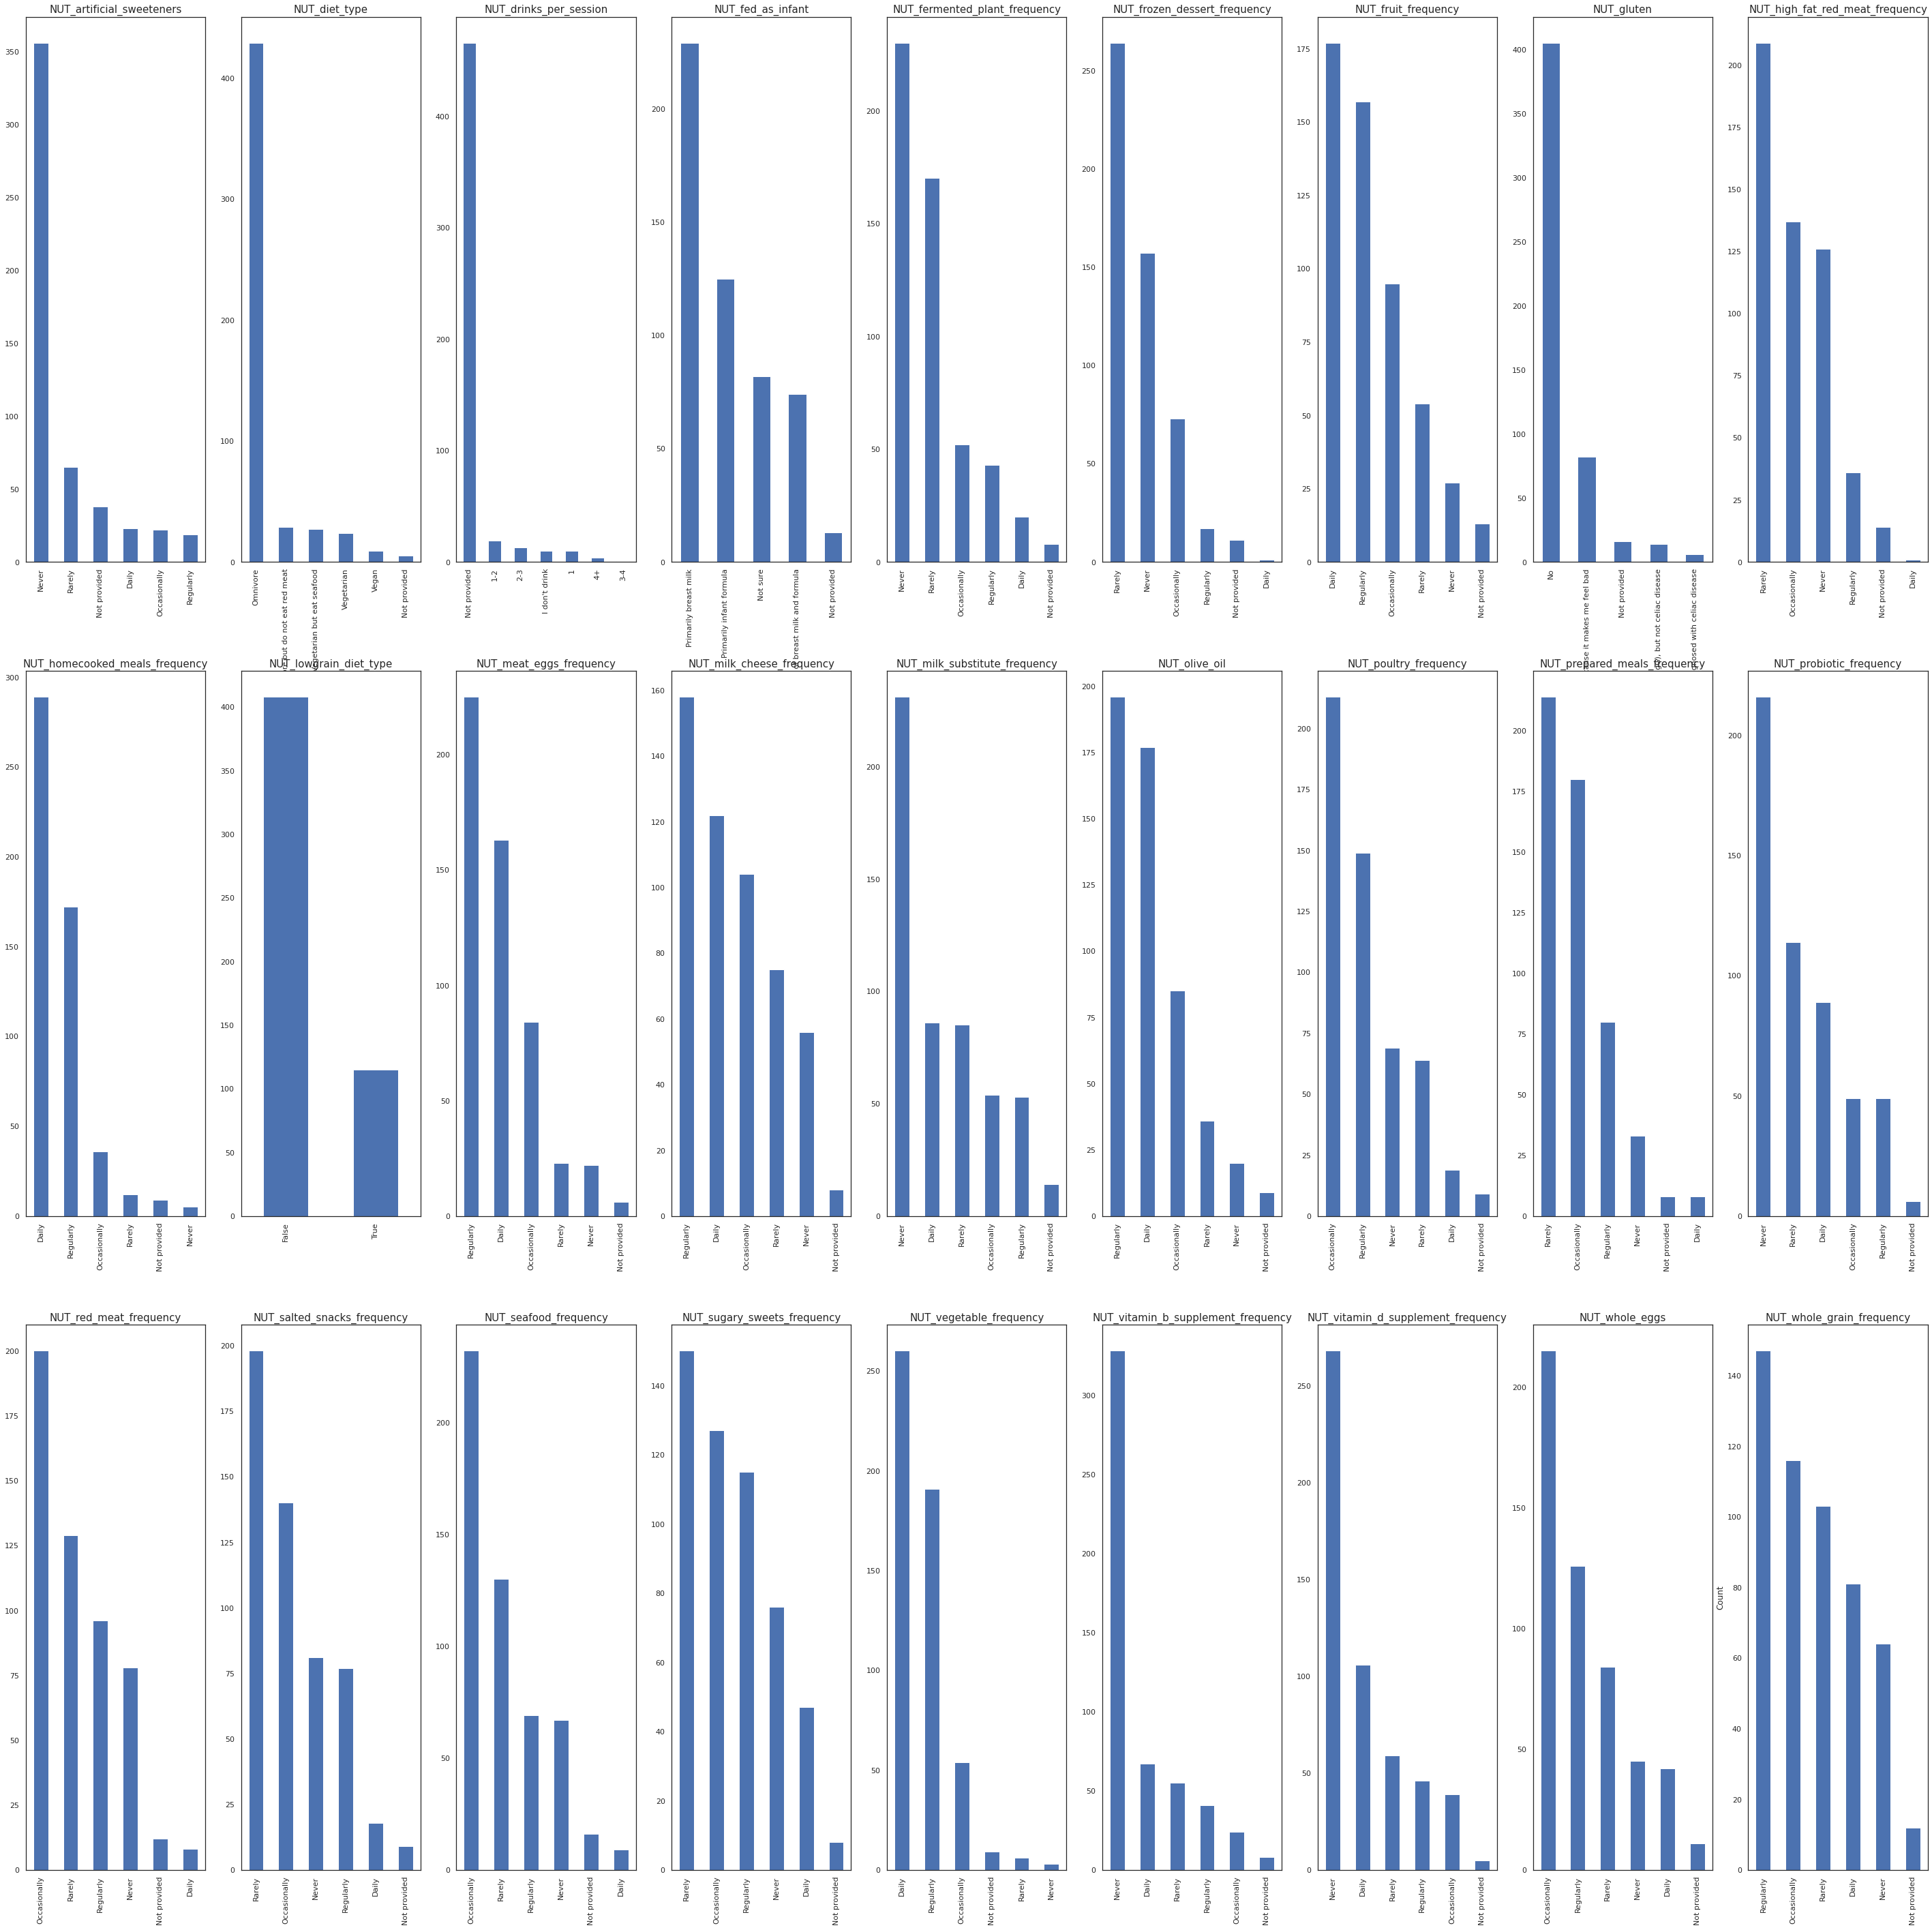

<Figure size 432x288 with 0 Axes>

In [45]:
fig, axes = plt.subplots(nrows=3, ncols=9, figsize=(50, 50))
b = -1
for i in range(3):
    for j in range(9):
        b += 1
        df_NUT_nonALC[df_NUT_nonALC.columns[b]].value_counts().plot(ax=axes[i,j],kind='bar')
        axes[i,j].set_title(df_NUT_nonALC.columns[b], fontsize=15)
        plt.ylabel('Count')
        
plt.figure()

In [46]:
df_meta.columns.tolist()

['GEN_age_cat',
 'GEN_age_corrected',
 'GEN_bmi_cat',
 'GEN_bmi_corrected',
 'GEN_cat',
 'GEN_collection_timestamp',
 'GEN_country',
 'GEN_dog',
 'GEN_elevation',
 'GEN_geo_loc_name',
 'GEN_height_cm',
 'GEN_host_common_name',
 'GEN_last_move',
 'GEN_last_travel',
 'GEN_latitude',
 'GEN_level_of_education',
 'GEN_longitude',
 'GEN_race',
 'GEN_sample_type',
 'GEN_sex',
 'GEN_weight_kg',
 'NUT_alcohol_consumption',
 'NUT_alcohol_frequency',
 'NUT_alcohol_types_beercider',
 'NUT_alcohol_types_red_wine',
 'NUT_alcohol_types_sour_beers',
 'NUT_alcohol_types_spiritshard_alcohol',
 'NUT_alcohol_types_unspecified',
 'NUT_alcohol_types_white_wine',
 'NUT_artificial_sweeteners',
 'NUT_diet_type',
 'NUT_drinks_per_session',
 'NUT_fed_as_infant',
 'NUT_fermented_plant_frequency',
 'NUT_frozen_dessert_frequency',
 'NUT_fruit_frequency',
 'NUT_gluten',
 'NUT_high_fat_red_meat_frequency',
 'NUT_homecooked_meals_frequency',
 'NUT_lowgrain_diet_type',
 'NUT_meat_eggs_frequency',
 'NUT_milk_cheese_freq

In [47]:
df_ALC['NUT_alcohol_frequency'].value_counts()

Occasionally    124
Regularly       122
Rarely          117
Never           103
Daily            52
Not provided      5
Name: NUT_alcohol_frequency, dtype: int64

#### 3.2 Create plots to investigate habits related to alcohol consumption

First we check the alcohol consumption frequency.

In [48]:
df_meta['NUT_alcohol_frequency'].unique()

array(['Rarely', 'Not provided', 'Regularly', 'Never', 'Occasionally',
       'Daily'], dtype=object)

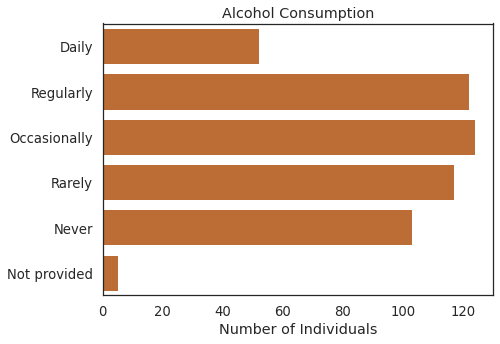

In [49]:
hue_object = ['Daily', 'Regularly', 'Occasionally', 'Rarely', 'Never', 'Not provided',]

sns.set(rc={'figure.figsize':(7, 5), 'font.family': ['Helvetica']}, style='white')

with sns.plotting_context("notebook", font_scale=1.2):
    # seaborn's bar plot
    ax = sns.countplot(
        y=df_ALC['NUT_alcohol_frequency'],
        order = hue_object,
        color='Chocolate')
    
    ax.set_xlabel('Number of Individuals')
    ax.set_ylabel('')
    ax.set_title('Alcohol Consumption')

    #plt.savefig('project_data/alc_frequencies.png', bbox_inches='tight', dpi=300)

In [13]:
df_ALC = df_ALC.drop('NUT_alcohol_frequency', axis=1)

To get a general overview over the alcohol habits in our dataset we count the corresponding occurances.

In [14]:
counts = []
for column in df_ALC.columns:
    c=df_ALC[column].value_counts()[True]
    counts.append(c)

In [15]:
col = df_ALC.columns

In [16]:
df = pd.DataFrame({'Counts': counts},  col)
df

,Counts
NUT_alcohol_consumption,415
NUT_alcohol_types_beercider,227
NUT_alcohol_types_red_wine,296
NUT_alcohol_types_sour_beers,31
NUT_alcohol_types_spiritshard_alcohol,175
NUT_alcohol_types_unspecified,115
NUT_alcohol_types_white_wine,222


Text(0, 0.5, 'Count')

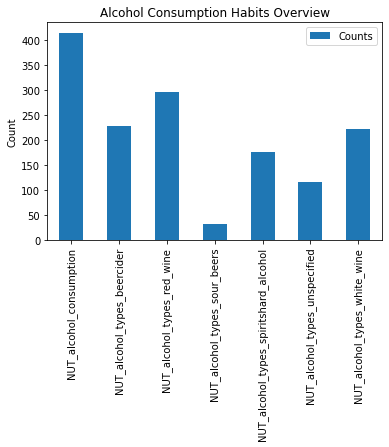

In [17]:
df.plot(kind='bar')
plt.title('Alcohol Consumption Habits Overview')
plt.ylabel('Count')